In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib import patches

In [3]:
from utils import from_feather

In [70]:
rcParams['figure.figsize'] = (10, 8)
rcParams['font.size'] = 16

In [4]:
x_trn, y_trn, x_tst = from_feather('x_trn', 'y_trn', 'x_tst')

In [6]:
x_trn.sample(5)

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
191332,1494,100,0.97293,0.17561,0.034416,0.146210,0.037585,-0.033739,-0.012073,-1.35990,3.64250,-8.940800
241900,1889,108,-0.79215,0.59137,0.085425,-0.124440,-0.024444,0.085415,-0.486990,0.21283,2.52390,-9.045100
271158,2118,54,0.47907,-0.86492,-0.126870,0.079406,-0.170420,-0.017242,0.082819,2.75660,9.24220,-6.121400
260470,2034,118,-0.41608,0.89622,0.137320,-0.069362,-0.044109,0.127110,-0.272980,4.10140,-0.75034,-18.648001
253466,1980,26,0.65157,-0.74970,-0.079804,0.083846,-0.044180,-0.004737,0.047499,0.39523,1.09250,-11.080000


In [7]:
y_trn.sample(5)

,series_id,group_id,surface
3357,3357,61,concrete
1465,1465,35,fine_concrete
73,73,34,soft_pvc
266,266,19,soft_pvc
1468,1468,21,soft_tiles


In [53]:
freq = (y_trn.surface
 .value_counts(normalize=True)
 .rename('freq')
 .reset_index()
 .rename(columns={'index': 'surface'}))

In [54]:
freq

,surface,freq
0,concrete,0.204462
1,soft_pvc,0.192126
2,wood,0.159318
3,tiled,0.134908
4,fine_concrete,0.095276
5,hard_tiles_large_space,0.080840
6,soft_tiles,0.077953
7,carpet,0.049606
8,hard_tiles,0.005512


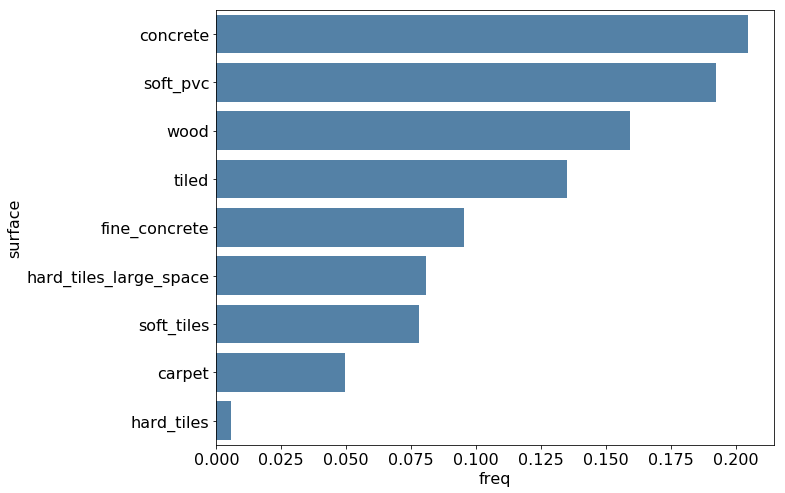

In [71]:
ax = sns.barplot(x='freq', y='surface', color='steelblue', data=freq)

In [163]:
cnt = (y_trn
       .groupby('group_id')
       .surface
       .value_counts()
       .rename('count')
       .reset_index()
       .sort_values(by='surface'))

In [164]:
group, surface, count = cnt['group_id'], cnt['surface'], cnt['count']

In [165]:
xs = list(range(len(cnt)))

In [166]:
uniq_surf = set(surface)
pal = sns.color_palette(n_colors=len(uniq_surf))
colors_map = dict(zip(uniq_surf, pal))
colors = [colors_map[surf] for surf in surface]

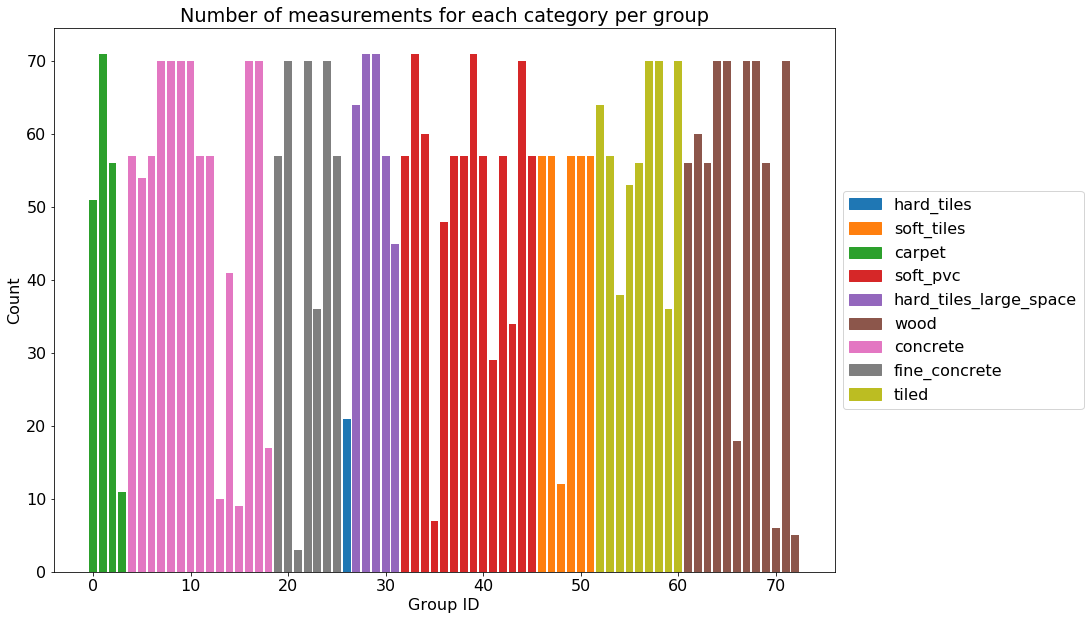

In [169]:
f, ax = plt.subplots(1, 1, figsize=(14, 10))
ax.bar(x=xs, height=count, color=colors)
ax.legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    handles=[patches.Patch(color=c, label=s) for s, c in colors_map.items()])
ax.set_xlabel('Group ID')
ax.set_ylabel('Count')
_ = ax.set_title('Number of measurements for each category per group')